In [567]:
# Compare SV callers' output in Venn/UpSetR diagrams. Uses a VCF file obtained by SURVIVOR merge of the call sets.

In [568]:
library(venn)

In [569]:
library(UpSetR)

In [570]:
library(vcfR)

In [571]:
sets<-c("Manta", "DELLY", "LUMPY", "GRIDSS")

In [572]:
nsets<-length(sets)

In [573]:
vcf<-read.vcfR('all.vcf', verbose = FALSE)

In [574]:
binvec<-sapply(strsplit(sapply(strsplit(getFIX(vcf, getINFO=TRUE)[, 'INFO'], ";"),
                       function(x) {x[2]}), '='), function (x) {x[2]})

In [575]:
#binvec

In [576]:
sets_sz<-data.frame(matrix(ncol=2, nrow=nsets))

In [577]:
names(sets_sz)<-c('caller', 'n')

In [578]:
for (i in 1:nsets) {
    s<-rep('.',nsets)
    s<-paste(replace(s,i,1), collapse='')
    re<-paste('^',s,'$', sep='')
    caller<-sets[i]
    n<-length(grep(s,binvec))
    sets_sz[i,]<-c(caller, n)
    #print(paste(caller, n))
}

In [579]:
#sets_sz

In [580]:
vec<-table(sapply(binvec, function(x) {strtoi(x, base=2)}))

In [581]:
#vec

In [582]:
lst<-strsplit(binvec, '')

In [583]:
#lst

In [584]:
s<-as.character(seq(0,(2**nsets-1)))

In [585]:
#s

In [586]:
N<-sapply(s, function(x){vec[x]}, USE.NAMES=FALSE)

In [587]:
N[is.na(N)]<-0

In [588]:
#N

In [589]:
slabels<-paste0(sets_sz$caller, ' (', sets_sz$n, ')')

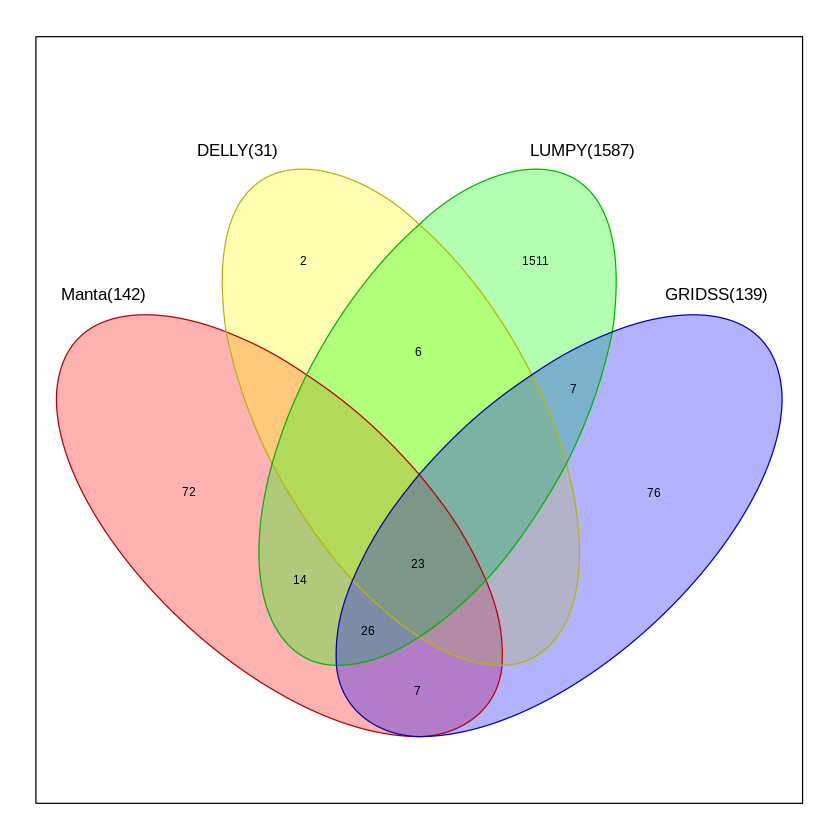

In [590]:
venn(nsets, counts=N, snames=slabels, ilabels=TRUE, zcolor="style", ellipse=TRUE)

In [591]:
nr<-length(lst)

In [592]:
#nr

In [593]:
nc<-length(lst[[1]])

In [594]:
#nc

In [595]:
M<-matrix(0, nrow=nr, ncol=nc)

In [596]:
for (i in 1:nr)
{
  M[i, ] <- as.integer(lst[[i]])
}

In [597]:
#M

In [598]:
sv<-data.frame(ID = getFIX(vcf)[, 'ID'], M)

In [599]:
#colnames(sv)

In [600]:
colnames(sv)[-1]<-slabels

In [601]:
#colnames(sv)

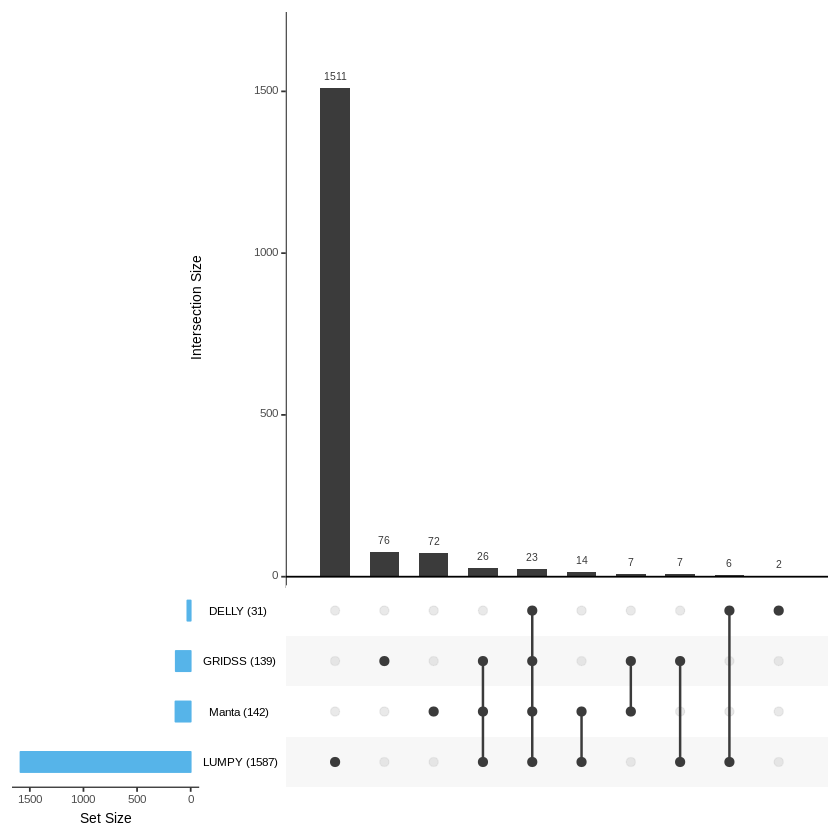

In [602]:
upset(sv, nsets=nsets, sets.bar.color="#56B4E9", order.by="freq")